In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('train.csv')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20104\616239795.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
# checking the shape of the dataset
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
#checking the null value
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
#checking the null value with percentage%
df.isnull().mean()

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
Credit_Score                

In [7]:
col_underscore=[col for col in df.columns if any('_' in str(value) for value in df[col]) ]

In [8]:
col_underscore

['Customer_ID',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [9]:
def remove_underscore(col):
    df[col]=df[col].apply(lambda x :str(x).replace('_','') if str(x) else x)
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
remove_underscore('Num_of_Delayed_Payment')
remove_underscore('Changed_Credit_Limit')
remove_underscore('Outstanding_Debt')
remove_underscore('Amount_invested_monthly')
remove_underscore('Monthly_Balance')


In [11]:
remove_underscore('Num_of_Loan')

In [12]:
remove_underscore('Annual_Income')

In [13]:
df.isnull().mean()

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.02091
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
Credit_Score                

## Data Preprocessing

### Handling missing value

In [14]:
def impute(df,variable):
    
    df[variable+'_random']=df[variable]
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random

In [15]:
impute(df,'Monthly_Inhand_Salary')

In [16]:
df['Type_of_Loan']=np.where(df['Type_of_Loan'].isnull(),'Missing',df['Type_of_Loan'])

In [17]:
impute(df,'Num_Credit_Inquiries')

In [18]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

In [19]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

In [20]:
df['Monthly_Balance']=df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [21]:
df['Credit_History_Age']=df['Credit_History_Age'].astype(str)

In [22]:
df['Credit_History_Age']=df['Credit_History_Age'].fillna(0)

In [23]:
df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x : int(x.split()[0])*12 + int(x.split()[3]) if len(x.split())==5 else 0)

In [24]:
df['Credit_History_Age']=df['Credit_History_Age'].astype(int)

In [25]:
df['Credit_History_Age']=df['Credit_History_Age'].replace(0,np.nan)

In [26]:
def impute1(df,variable):
   
    df[variable+'_random']=df[variable]
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random

In [27]:
impute1(df,'Credit_History_Age')

In [28]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

In [29]:
df['Payment_of_Min_Amount'].replace('NM','No',inplace=True)

In [30]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [31]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace=True)

In [32]:
df['Payment_Behaviour']=df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])

In [33]:
df['Payment_Behaviour'].isnull().sum()

0

In [34]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [35]:
df['Credit_Mix']=df['Credit_Mix'].replace('_','Missing')

In [36]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Missing     20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [37]:
df['Type_of_Loan']=df['Type_of_Loan'].astype(str)

In [38]:
df['Type_of_Loan']=df['Type_of_Loan'].str.split(',',n=1).str[0]

In [39]:
df['Type_of_Loan'].isnull().sum()

0

In [40]:
df['Type_of_Loan'].value_counts()

Missing                    11408
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: Type_of_Loan, dtype: int64

In [ ]:
Num_of_Loan
Num_Bank_Accounts,
Delay_from_due_date,
Num_of_Delayed_Payment,
Monthly_Balance have negative strange number
Amount_invested_monthly have positive strange number
Changed_Credit_Limit

In [41]:
df.loc[df['Changed_Credit_Limit']<0, 'Changed_Credit_Limit'] = None

In [42]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

In [43]:
df['Num_of_Loan']=df['Num_of_Loan'].astype(float)

In [44]:
df.loc[df['Num_of_Loan']< 0, 'Num_of_Loan'] = None

In [45]:
df['Num_of_Loan']=df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())

In [46]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [47]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())

In [48]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [49]:
df['Delay_from_due_date']=df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].median())

In [50]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [51]:
impute1(df,'Monthly_Balance')

In [52]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

In [53]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

### Handling outlier 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            100000 non-null  object 
 1   Customer_ID                   100000 non-null  object 
 2   Month                         100000 non-null  object 
 3   Name                          90015 non-null   object 
 4   Age                           100000 non-null  object 
 5   SSN                           100000 non-null  object 
 6   Occupation                    100000 non-null  object 
 7   Annual_Income                 100000 non-null  float64
 8   Monthly_Inhand_Salary         100000 non-null  float64
 9   Num_Bank_Accounts             100000 non-null  int64  
 10  Num_Credit_Card               100000 non-null  int64  
 11  Interest_Rate                 100000 non-null  int64  
 12  Num_of_Loan                   100000 non-null

## Annual_Income

<AxesSubplot:xlabel='Annual_Income'>

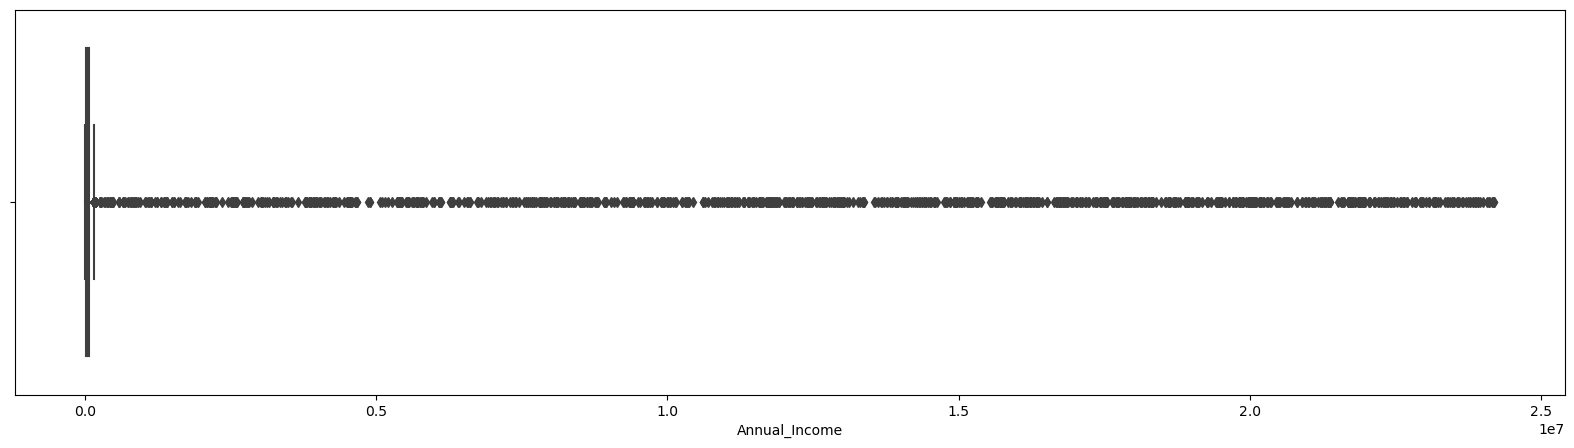

In [61]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x='Annual_Income')

In [62]:
IQR=df['Annual_Income'].quantile(0.75)-df['Annual_Income'].quantile(0.25)
upper_bridge=df['Annual_Income'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Annual_Income'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-60542.630000000005
152791.05


In [63]:
df.loc[df['Annual_Income']>152791,'Annual_Income']=152791

<AxesSubplot:xlabel='Annual_Income'>

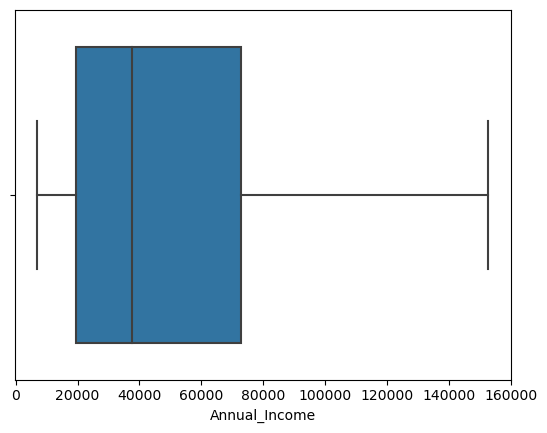

In [64]:
sns.boxplot(df,x='Annual_Income')

## Monthly_Inhand_Salary

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

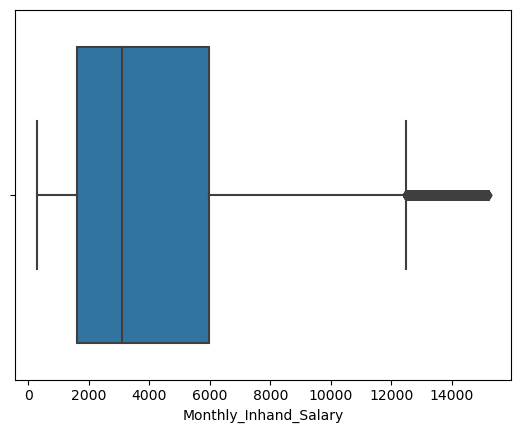

In [65]:
sns.boxplot(df,x='Monthly_Inhand_Salary')

In [66]:
IQR=df['Monthly_Inhand_Salary'].quantile(0.75)-df['Monthly_Inhand_Salary'].quantile(0.25)
upper_bridge=df['Monthly_Inhand_Salary'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Monthly_Inhand_Salary'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-4887.835416666666
12480.434583333332


In [67]:
df.loc[df['Monthly_Inhand_Salary']>12480,'Monthly_Inhand_Salary']=12480

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

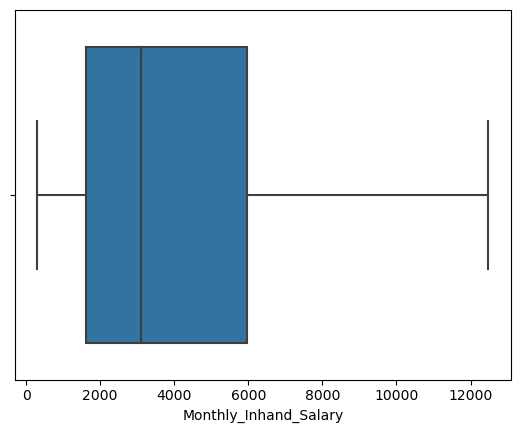

In [68]:
sns.boxplot(df,x='Monthly_Inhand_Salary')

## NUM_bank_accounts

<AxesSubplot:xlabel='Num_Bank_Accounts'>

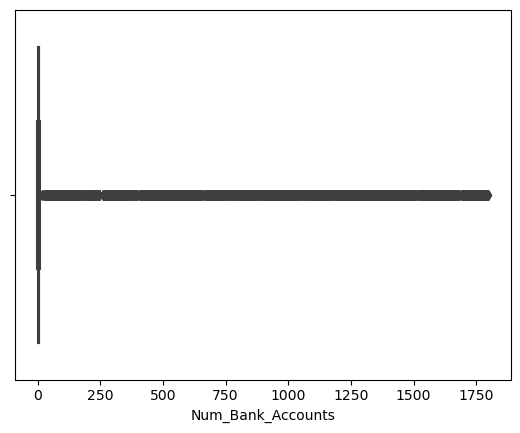

In [84]:
sns.boxplot(df,x='Num_Bank_Accounts')

In [69]:
IQR=df['Num_Bank_Accounts'].quantile(0.75)-df['Num_Bank_Accounts'].quantile(0.25)
upper_bridge=df['Num_Bank_Accounts'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Num_Bank_Accounts'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-3.0
13.0


In [70]:
df.loc[df['Num_Bank_Accounts']>13,'Num_Bank_Accounts']=13

In [126]:
df.loc[df['Num_Bank_Accounts']<0,'Num_Bank_Accounts']=0

<AxesSubplot:xlabel='Num_Bank_Accounts'>

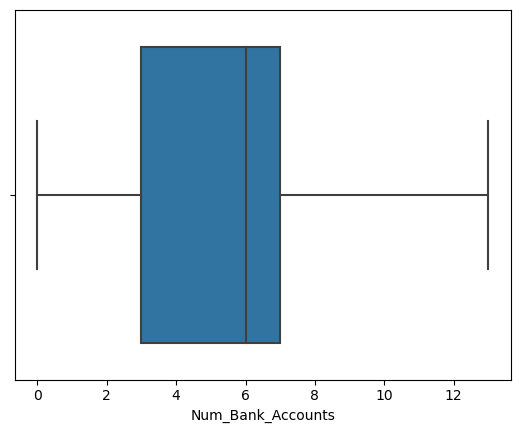

In [127]:
sns.boxplot(df,x='Num_Bank_Accounts')

## Num_Credit_Card

<AxesSubplot:xlabel='Num_Credit_Card'>

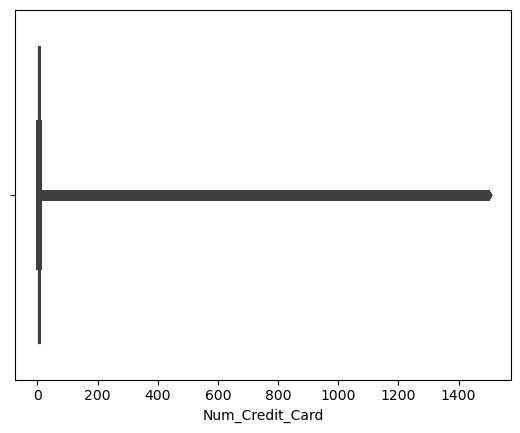

In [90]:
sns.boxplot(df,x='Num_Credit_Card')

In [71]:
IQR=df['Num_Credit_Card'].quantile(0.75)-df['Num_Credit_Card'].quantile(0.25)
upper_bridge=df['Num_Credit_Card'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Num_Credit_Card'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-0.5
11.5


In [72]:
df.loc[df['Num_Credit_Card']>11.5,'Num_Credit_Card']=11.5

<AxesSubplot:xlabel='Num_Credit_Card'>

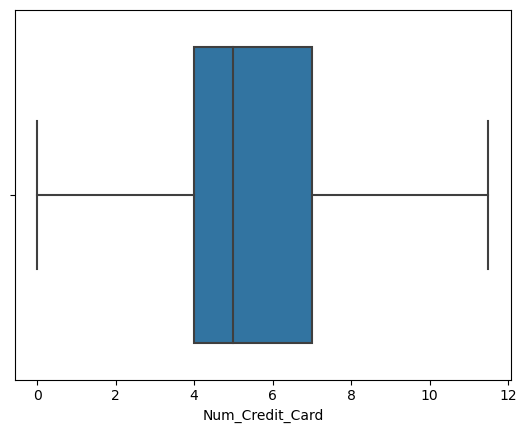

In [93]:
sns.boxplot(df,x='Num_Credit_Card')

## Interest_Rate

<AxesSubplot:xlabel='Interest_Rate'>

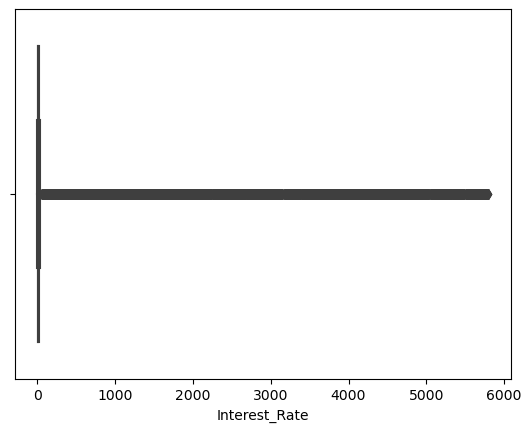

In [95]:
sns.boxplot(df,x='Interest_Rate')

In [73]:
IQR=df['Interest_Rate'].quantile(0.75)-df['Num_Credit_Card'].quantile(0.25)
upper_bridge=df['Interest_Rate'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Interest_Rate'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-16.0
44.0


In [74]:
df.loc[df['Interest_Rate']>44,'Interest_Rate']=44

<AxesSubplot:xlabel='Interest_Rate'>

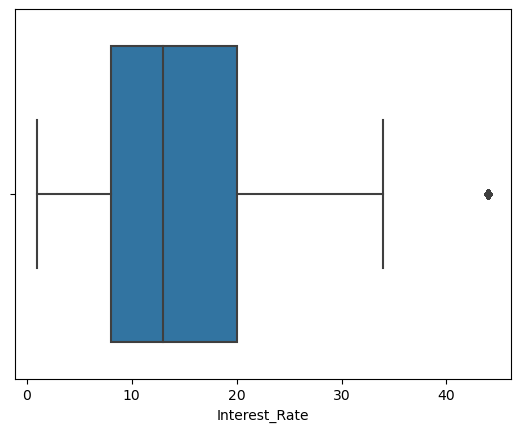

In [98]:
sns.boxplot(df,x='Interest_Rate')

## Num_of_Loan

<AxesSubplot:xlabel='Num_of_Loan'>

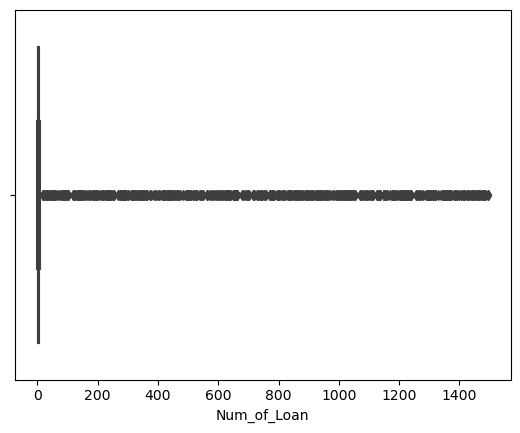

In [99]:
sns.boxplot(df,x='Num_of_Loan')

In [75]:
IQR=df['Num_of_Loan'].quantile(0.75)-df['Num_of_Loan'].quantile(0.25)
upper_bridge=df['Num_of_Loan'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Num_of_Loan'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-2.5
9.5


In [76]:
df.loc[df['Num_of_Loan']>9.5,'Num_of_Loan']=9.5

<AxesSubplot:xlabel='Num_of_Loan'>

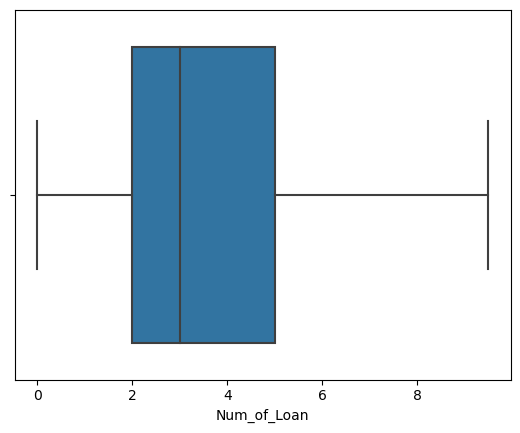

In [103]:
sns.boxplot(df,x='Num_of_Loan')

 ## Delay_from_due_date

<AxesSubplot:xlabel='Delay_from_due_date'>

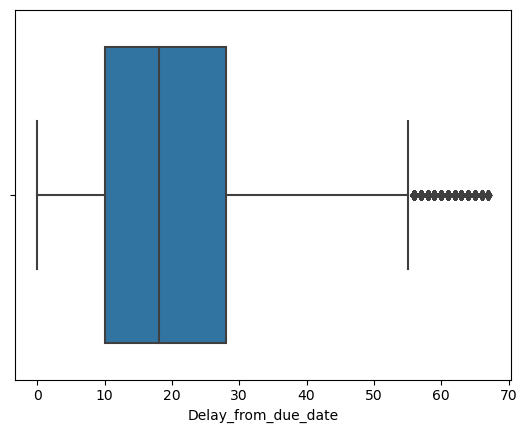

In [104]:
sns.boxplot(df,x='Delay_from_due_date')

In [77]:
IQR=df['Delay_from_due_date'].quantile(0.75)-df['Delay_from_due_date'].quantile(0.25)
upper_bridge=df['Delay_from_due_date'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Delay_from_due_date'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-17.0
55.0


In [78]:
df.loc[df['Delay_from_due_date']>55,'Delay_from_due_date']=55

<AxesSubplot:xlabel='Delay_from_due_date'>

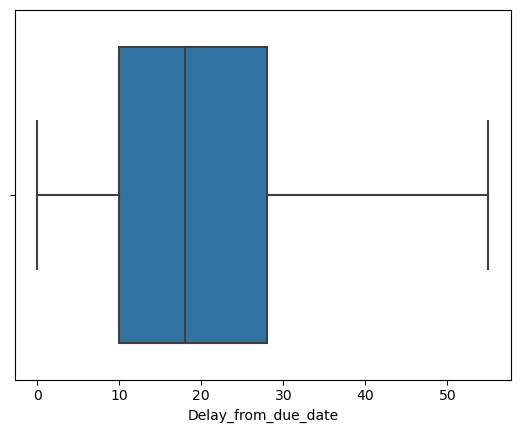

In [107]:
sns.boxplot(df,x='Delay_from_due_date')

## Num_of_Delayed_Payment 

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

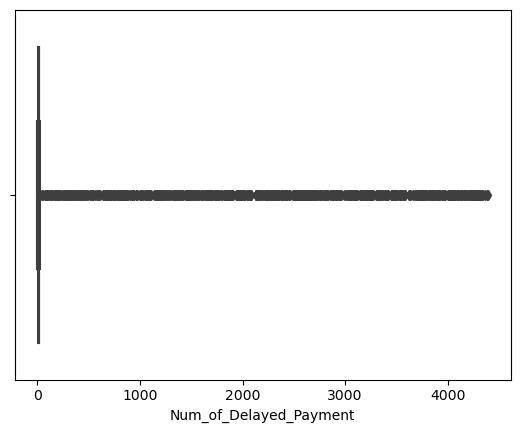

In [108]:
sns.boxplot(df,x='Num_of_Delayed_Payment')

In [79]:
IQR=df['Num_of_Delayed_Payment'].quantile(0.75)-df['Num_of_Delayed_Payment'].quantile(0.25)
upper_bridge=df['Num_of_Delayed_Payment'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Num_of_Delayed_Payment'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-4.5
31.5


In [80]:
df.loc[df['Num_of_Delayed_Payment']>31.5,'Num_of_Delayed_Payment']=31.5

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

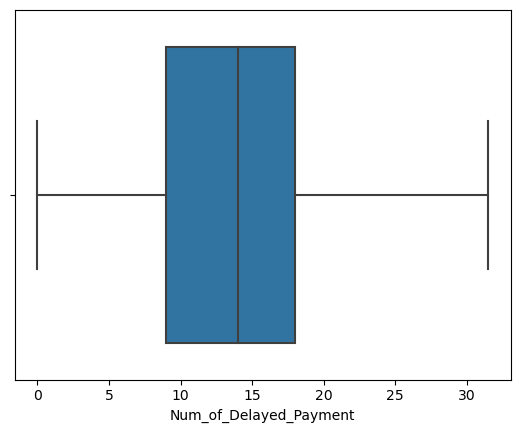

In [114]:
sns.boxplot(df,x='Num_of_Delayed_Payment')

## Changed_Credit_Limit

<AxesSubplot:xlabel='Changed_Credit_Limit'>

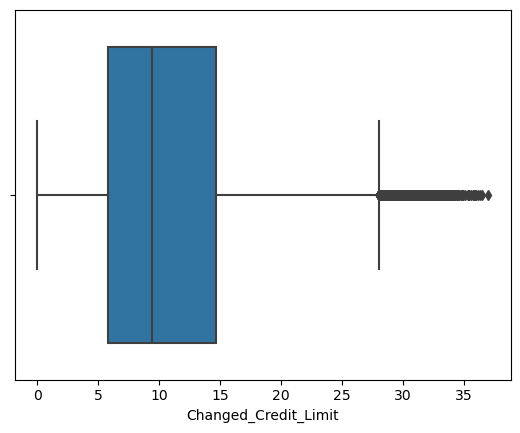

In [115]:
sns.boxplot(df,x='Changed_Credit_Limit')

In [81]:
IQR=df['Changed_Credit_Limit'].quantile(0.75)-df['Changed_Credit_Limit'].quantile(0.25)
upper_bridge=df['Changed_Credit_Limit'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Changed_Credit_Limit'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-7.590000000000002
28.01


In [82]:
df.loc[df['Changed_Credit_Limit']>28,'Changed_Credit_Limit']=28

<AxesSubplot:xlabel='Changed_Credit_Limit'>

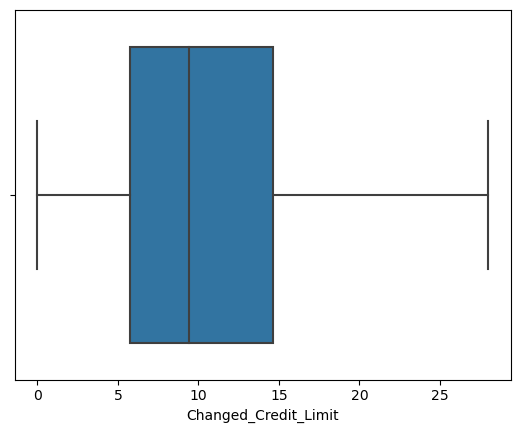

In [118]:
sns.boxplot(df,x='Changed_Credit_Limit')

## Num_Credit_Inquiries

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

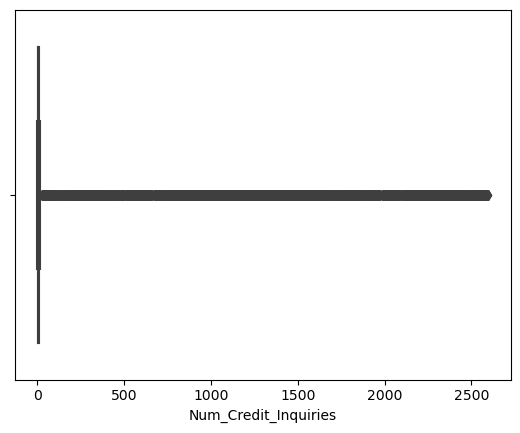

In [119]:
sns.boxplot(df,x='Num_Credit_Inquiries')

In [83]:
IQR=df['Num_Credit_Inquiries'].quantile(0.75)-df['Num_Credit_Inquiries'].quantile(0.25)
upper_bridge=df['Num_Credit_Inquiries'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Num_Credit_Inquiries'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.0
18.0


In [84]:
df.loc[df['Num_Credit_Inquiries']>18,'Num_Credit_Inquiries']=18

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

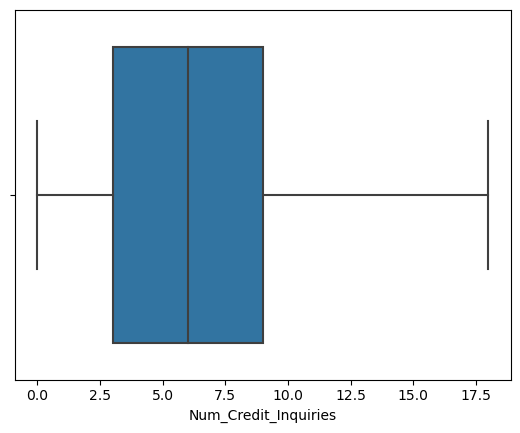

In [122]:
sns.boxplot(df,x='Num_Credit_Inquiries')

## Outstanding_Debt            

<AxesSubplot:xlabel='Outstanding_Debt'>

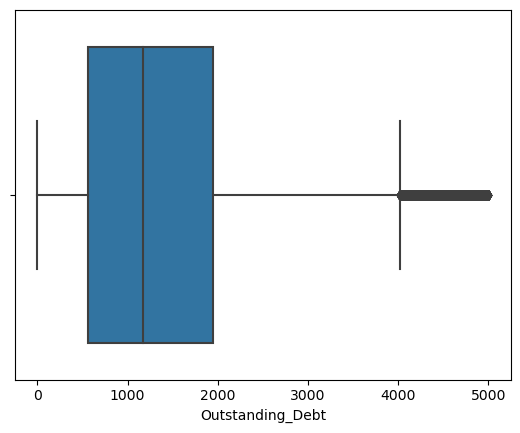

In [123]:
sns.boxplot(df,x='Outstanding_Debt')

In [85]:
IQR=df['Outstanding_Debt'].quantile(0.75)-df['Outstanding_Debt'].quantile(0.25)
upper_bridge=df['Outstanding_Debt'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Outstanding_Debt'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1503.7625
4015.7975


In [86]:
df.loc[df['Outstanding_Debt']>4015,'Outstanding_Debt']=4015

<AxesSubplot:xlabel='Outstanding_Debt'>

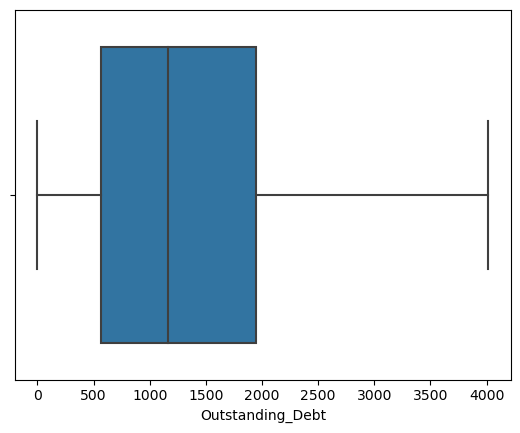

In [126]:
sns.boxplot(df,x='Outstanding_Debt')

## Credit_Utilization_Ratio  

<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

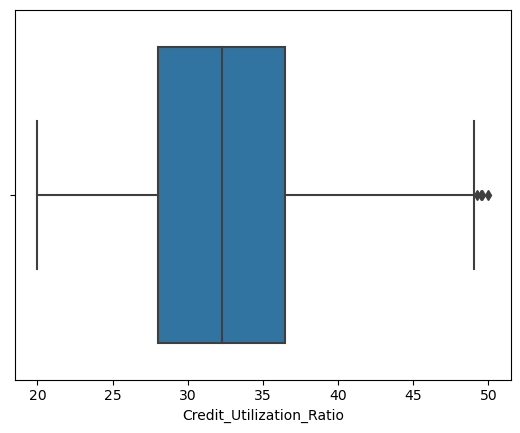

In [127]:
sns.boxplot(df,x='Credit_Utilization_Ratio')

In [87]:
IQR=df['Credit_Utilization_Ratio'].quantile(0.75)-df['Credit_Utilization_Ratio'].quantile(0.25)
upper_bridge=df['Credit_Utilization_Ratio'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Credit_Utilization_Ratio'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

15.38642181919627
49.1628077980216


In [88]:
df.loc[df['Credit_Utilization_Ratio']>49,'Credit_Utilization_Ratio']=49

<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

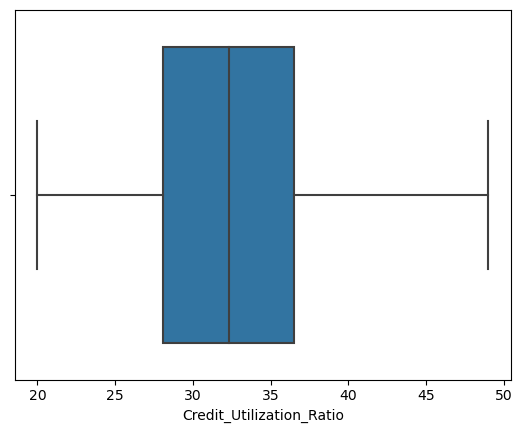

In [130]:
sns.boxplot(df,x='Credit_Utilization_Ratio')

## Credit_History_Age 

<AxesSubplot:xlabel='Credit_History_Age'>

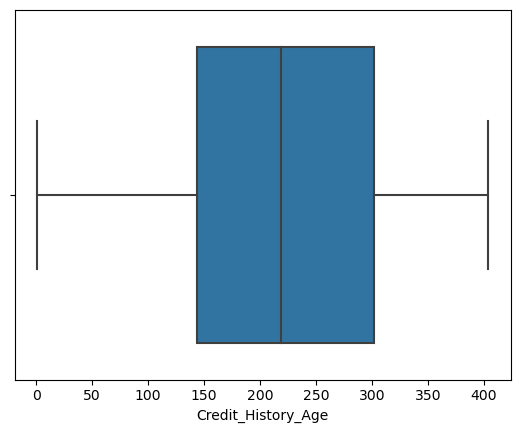

In [132]:
sns.boxplot(df,x='Credit_History_Age')

## Total_EMI_per_month

<AxesSubplot:xlabel='Total_EMI_per_month'>

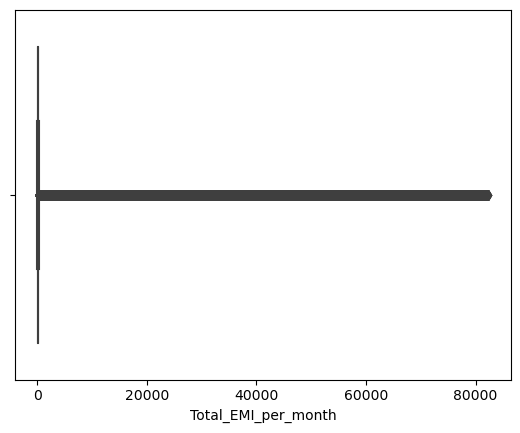

In [133]:
sns.boxplot(df,x='Total_EMI_per_month')

In [89]:
IQR=df['Total_EMI_per_month'].quantile(0.75)-df['Total_EMI_per_month'].quantile(0.25)
upper_bridge=df['Total_EMI_per_month'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Total_EMI_per_month'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-166.06972242783047
357.60063203221614


In [90]:
df.loc[df['Total_EMI_per_month']>357,'Total_EMI_per_month']=357

<AxesSubplot:xlabel='Total_EMI_per_month'>

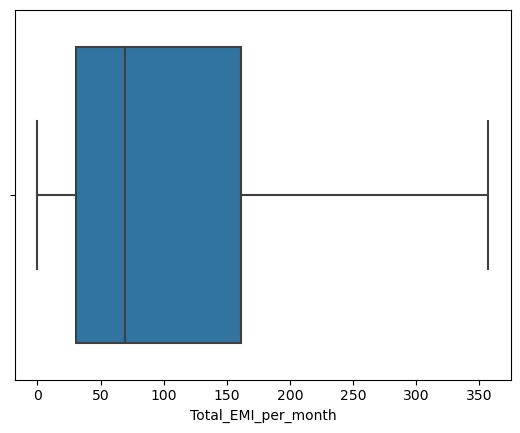

In [137]:
sns.boxplot(df,x='Total_EMI_per_month')

## Amount_invested_monthly

<AxesSubplot:xlabel='Amount_invested_monthly'>

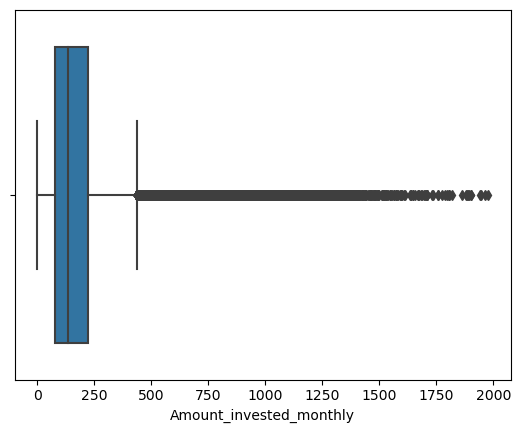

In [138]:
sns.boxplot(df,x='Amount_invested_monthly')

In [91]:
IQR=df['Amount_invested_monthly'].quantile(0.75)-df['Amount_invested_monthly'].quantile(0.25)
upper_bridge=df['Amount_invested_monthly'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Amount_invested_monthly'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-137.51504845670908
434.5715177012439


In [92]:
df.loc[df['Amount_invested_monthly']>434,'Amount_invested_monthly']=434

<AxesSubplot:xlabel='Amount_invested_monthly'>

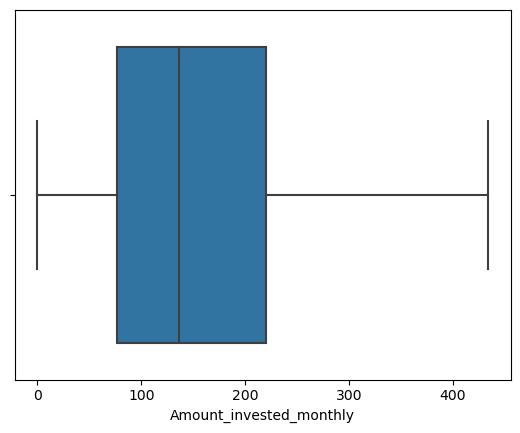

In [141]:
sns.boxplot(df,x='Amount_invested_monthly')

## Monthly_Balance

<AxesSubplot:xlabel='Monthly_Balance'>

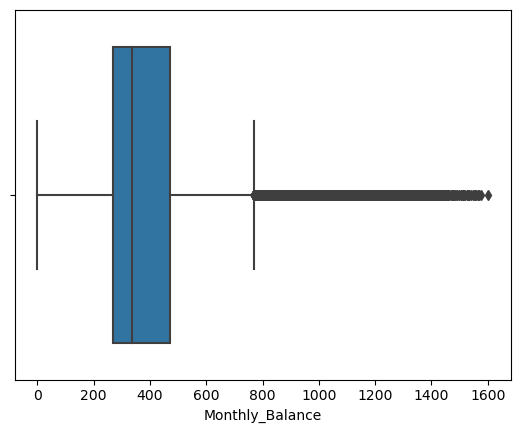

In [142]:
sns.boxplot(df,x='Monthly_Balance')

In [93]:
IQR=df['Monthly_Balance'].quantile(0.75)-df['Monthly_Balance'].quantile(0.25)
upper_bridge=df['Monthly_Balance'].quantile(0.75)+(IQR*1.5)
lower_bridge=df['Monthly_Balance'].quantile(0.25)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-29.762068847475405
769.7651930247612


In [94]:
df.loc[df['Monthly_Balance']>769,'Monthly_Balance']=769

<AxesSubplot:xlabel='Monthly_Balance'>

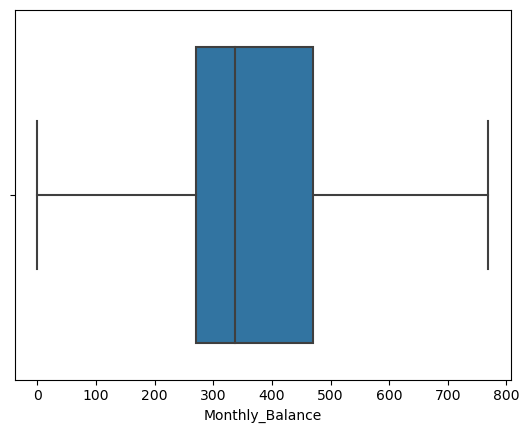

In [145]:
sns.boxplot(df,x='Monthly_Balance')

## Changing the Categorical feature into Numerical feature

In [95]:
df['Type_of_Loan'].value_counts()

Missing                    11408
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: Type_of_Loan, dtype: int64

In [96]:
df['Type_of_Loan']=df['Type_of_Loan'].map({'Missing':0,'Credit-Builder Loan':1,'Payday Loan':2,'Personal Loan':3,
                                          'Not Specified':4,'Student Loan':5,'Debt Consolidation Loan':6,'Mortgage Loan':7,
                                          'Auto Loan':8,'Home Equity Loan':9 })

In [97]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Missing     20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [98]:
df['Credit_Mix']=df['Credit_Mix'].map({'Missing':0,'Bad':1,'Good':2,'Standard':3})

In [99]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [100]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].map({'No':0,'Yes':1})

In [101]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [102]:
df['Payment_Behaviour']=df['Payment_Behaviour'].map({'Low_spent_Small_value_payments':1,'Low_spent_Medium_value_payments':2,
                                                    'Low_spent_Large_value_payments':3,'High_spent_Small_value_payments':4,
                                                    'High_spent_Medium_value_payments':5,'High_spent_Large_value_payments':6})

In [103]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [104]:
df['Credit_Score']=df['Credit_Score'].map({'Poor':0,'Good':1,'Standard':2})

In [139]:
df.to_csv('credit_card_score.csv',index=False)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  in

## Feature selection

In [107]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [128]:
X=df[['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts',
       'Num_Credit_Card','Interest_Rate', 'Num_of_Loan','Type_of_Loan',
       'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
       'Num_Credit_Inquiries','Credit_Mix','Outstanding_Debt',
       'Credit_Utilization_Ratio','Credit_History_Age',
       'Payment_of_Min_Amount','Total_EMI_per_month',
       'Amount_invested_monthly','Payment_Behaviour','Monthly_Balance',]]

In [129]:
Y=df[['Credit_Score']]

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [131]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=20)
featue=ordered_rank_feature.fit(X,Y)

In [132]:
df1=pd.DataFrame(featue.scores_,columns=['score'])
df2=pd.DataFrame(X.columns)

In [133]:
feature_rank=pd.concat([df2,df1],axis=1)
feature_rank.columns=['feature','score']

In [136]:
feature_rank.nlargest(28,'score')

,feature,score
0,Annual_Income,1.235340e+08
12,Outstanding_Debt,1.387395e+07
1,Monthly_Inhand_Salary,7.284386e+06
14,Credit_History_Age,5.579887e+05
19,Monthly_Balance,3.522240e+05
7,Delay_from_due_date,1.816984e+05
17,Amount_invested_monthly,1.514549e+05
4,Interest_Rate,1.128792e+05
10,Num_Credit_Inquiries,4.441064e+04
8,Num_of_Delayed_Payment,3.460908e+04


In [137]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
model_data=pd.Series(mutual_info,index=X.columns)
model_data.sort_values(ascending=False)

Annual_Income               0.610760
Outstanding_Debt            0.592816
Total_EMI_per_month         0.524799
Monthly_Inhand_Salary       0.445459
Interest_Rate               0.167953
Credit_Mix                  0.155120
Delay_from_due_date         0.121423
Num_Credit_Inquiries        0.113087
Num_Credit_Card             0.111736
Num_Bank_Accounts           0.102507
Payment_of_Min_Amount       0.098449
Changed_Credit_Limit        0.095202
Num_of_Loan                 0.086021
Credit_History_Age          0.082557
Num_of_Delayed_Payment      0.081872
Monthly_Balance             0.032402
Type_of_Loan                0.013741
Payment_Behaviour           0.007137
Amount_invested_monthly     0.006272
Credit_Utilization_Ratio    0.000000
dtype: float64